In [1]:
import numpy as np
import pandas as pd
from math import pi

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [2]:
cd ..

/Users/alphonsowoodbury/DS/mod2project/flatiron_mod2_project_kch


In [10]:
df = pd.read_csv('kc_cleaned.csv')
df.zipcode = df.zipcode.astype('str')
df = df.drop(['lat','long'],axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,zipcode,sqft_living15,sqft_lot15,has_waterfront,has_basement,has_renovation,eff_built
0,221900.0,3,1,1180.0,5650.0,1,0,3,7,98178,1340.0,5650.0,0,0,0,65
1,538000.0,3,2,2570.0,7242.0,2,0,3,7,98125,1690.0,7639.0,0,1,1,29
2,180000.0,2,1,770.0,10000.0,1,0,3,6,98028,2720.0,8062.0,0,0,0,87
3,604000.0,4,3,1960.0,5000.0,1,0,5,7,98136,1360.0,5000.0,0,1,0,55
4,510000.0,3,2,1680.0,8080.0,1,0,3,8,98074,1800.0,7503.0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2,1530.0,1131.0,3,0,3,8,98103,1530.0,1509.0,0,0,0,11
21593,400000.0,4,2,2310.0,5813.0,2,0,3,8,98146,1830.0,7200.0,0,0,0,6
21594,402101.0,2,0,1020.0,1350.0,2,0,3,7,98144,1020.0,2007.0,0,0,0,11
21595,400000.0,3,2,1600.0,2388.0,2,0,3,8,98027,1410.0,1287.0,0,0,0,16


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null int64
sqft_living       21597 non-null float64
sqft_lot          21597 non-null float64
floors            21597 non-null int64
view              21597 non-null int64
condition         21597 non-null int64
grade             21597 non-null int64
zipcode           21597 non-null object
sqft_living15     21597 non-null float64
sqft_lot15        21597 non-null float64
has_waterfront    21597 non-null int64
has_basement      21597 non-null int64
has_renovation    21597 non-null int64
eff_built         21597 non-null int64
dtypes: float64(5), int64(10), object(1)
memory usage: 2.6+ MB


In [12]:
cols = df.columns
x_cols = cols[1:]
x_cols

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'has_waterfront', 'has_basement', 'has_renovation', 'eff_built'],
      dtype='object')

In [13]:
df[x_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
bedrooms          21597 non-null int64
bathrooms         21597 non-null int64
sqft_living       21597 non-null float64
sqft_lot          21597 non-null float64
floors            21597 non-null int64
view              21597 non-null int64
condition         21597 non-null int64
grade             21597 non-null int64
zipcode           21597 non-null object
sqft_living15     21597 non-null float64
sqft_lot15        21597 non-null float64
has_waterfront    21597 non-null int64
has_basement      21597 non-null int64
has_renovation    21597 non-null int64
eff_built         21597 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 2.5+ MB


In [14]:
categorical_variables = ['zipcode']
categorical_variables

['zipcode']

In [15]:
df_ohe = pd.get_dummies(df[x_cols], columns=categorical_variables,drop_first=True)
df_ohe.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_living15,sqft_lot15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1,1180.0,5650.0,1,0,3,7,1340.0,5650.0,...,0,0,0,0,0,0,1,0,0,0
1,3,2,2570.0,7242.0,2,0,3,7,1690.0,7639.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,770.0,10000.0,1,0,3,6,2720.0,8062.0,...,0,0,0,0,0,0,0,0,0,0
3,4,3,1960.0,5000.0,1,0,5,7,1360.0,5000.0,...,0,0,0,0,0,0,0,0,0,0
4,3,2,1680.0,8080.0,1,0,3,8,1800.0,7503.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
print(df_ohe.shape)

(21597, 83)


In [17]:
df_ohe.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_living15,sqft_lot15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
bedrooms,1.000000,0.465995,0.578212,0.032471,0.158065,0.078354,0.026496,0.356563,0.393406,0.030690,...,-0.031151,-0.012931,-0.007890,0.000560,-0.045699,0.002700,-0.008118,0.005210,-0.023639,-0.021325
bathrooms,0.465995,1.000000,0.698591,0.086029,0.486404,0.175111,-0.127328,0.607156,0.510950,0.082039,...,-0.062797,-0.018181,-0.046927,-0.027891,-0.080724,-0.006668,-0.047062,-0.023197,-0.046386,0.007889
sqft_living,0.578212,0.698591,1.000000,0.173453,0.353372,0.281715,-0.059445,0.762779,0.756402,0.184342,...,-0.058106,-0.026323,-0.046455,-0.001475,-0.074826,0.028933,-0.042364,-0.024066,-0.041815,0.010832
sqft_lot,0.032471,0.086029,0.173453,1.000000,-0.008603,0.075054,-0.008830,0.114731,0.144763,0.718204,...,-0.017066,-0.007625,-0.016883,-0.003925,-0.010386,-0.008433,-0.018171,-0.009560,-0.012657,-0.028480
floors,0.158065,0.486404,0.353372,-0.008603,1.000000,0.023711,-0.293463,0.473273,0.296797,-0.012766,...,-0.057402,-0.023593,-0.073133,-0.047711,-0.073389,-0.039418,-0.062756,-0.037832,-0.054074,-0.009337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zipcode_98177,0.002700,-0.006668,0.028933,-0.008433,-0.039418,0.082709,0.014164,0.029681,0.031837,-0.004281,...,-0.012708,-0.005623,-0.015873,-0.011925,-0.012276,1.000000,-0.012113,-0.008702,-0.012528,-0.013341
zipcode_98178,-0.008118,-0.047062,-0.042364,-0.018171,-0.062756,0.043647,-0.015198,-0.079451,-0.054631,-0.018725,...,-0.012883,-0.005701,-0.016092,-0.012089,-0.012445,-0.012113,1.000000,-0.008822,-0.012700,-0.013525
zipcode_98188,0.005210,-0.023197,-0.024066,-0.009560,-0.037832,-0.008966,-0.009660,-0.042148,-0.040701,-0.008772,...,-0.009255,-0.004095,-0.011560,-0.008684,-0.008940,-0.008702,-0.008822,1.000000,-0.009123,-0.009716
zipcode_98198,-0.023639,-0.046386,-0.041815,-0.012657,-0.054074,0.053909,0.005819,-0.054154,-0.046004,-0.013782,...,-0.013324,-0.005896,-0.016642,-0.012503,-0.012871,-0.012528,-0.012700,-0.009123,1.000000,-0.013988


#### Im unsure of most of whats below here... -aw

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
vif = [variance_inflation_factor(df_ohe.values, i) for i in range(df_ohe.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 22.267855406577265),
 ('bathrooms', 16.494279084566053),
 ('sqft_living', 26.95435159967359),
 ('sqft_lot', 2.3971133975053007),
 ('floors', 17.528496442989717),
 ('view', 1.5688911154328666),
 ('condition', 32.67360679464663),
 ('grade', 96.68520005454494),
 ('zipcode', 30.565773592192585),
 ('sqft_living15', 2.7685285758900062),
 ('sqft_lot15', 1.2224639999511464),
 ('has_waterfront', 2.3688602356324076),
 ('has_basement', 1.1522384304073328),
 ('has_renovation', 9.445036966176154),
 ('eff_built', 1.415883754873264)]

In [21]:
from sklearn.model_selection import train_test_split

X = df_ohe
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=55)

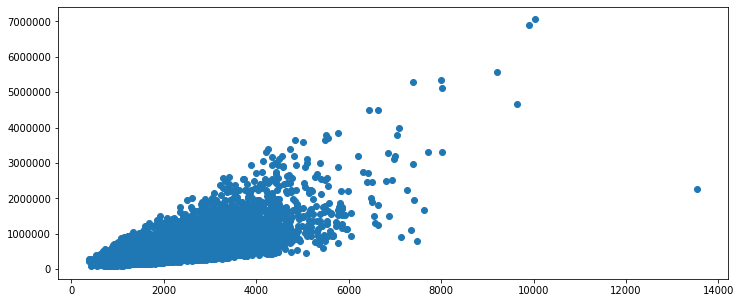

In [22]:
plt.figure(figsize = (12, 5))

plt.scatter(X_train.sqft_living,y_train)


plt.show()

**talked to Ammar, 

X_train... 

import LR
lr.fit(x_train, y_train) #at this point it is trained


In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr.predict #prdict price on test data

y_test is answer to the running the model on x_test dataset (error, residual(lowest possible))